# 3D $N^2$-Queens MCMC Solver

This notebook implements a Markov Chain Monte Carlo (MCMC) approach to solve the 3D $N^2$-Queens problem using:
- **Simulated Annealing**: Temperature controlled via exponential cooling schedule
- **Metropolis-Hastings Algorithm**: Probabilistic acceptance of proposed moves
- **Energy-based Search**: Minimizing queen conflicts in 3D space

The goal is to place $N²$ queens on an $N×N×N$ chessboard such that no two queens attack each other.

In [1]:
import sys
import matplotlib.pyplot as plt

from pathlib import Path

src_path = Path('.').resolve()
sys.path.insert(0, str(src_path))

from mcmc import mcmc_chain, exponential_beta, metropolis_hastings
from visualization import visualize_results

%load_ext autoreload
%autoreload 2

## Run MCMC Chain

Execute the MCMC solver with the configured parameters. The algorithm will:
1. Initialize N² queens randomly on an N×N×N board
2. Iteratively propose random queen moves
3. Accept/reject moves using Metropolis-Hastings criterion
4. Cool down via exponential annealing schedule
5. Track energy and acceptance rate throughout the run

Running MCMC for 15×15×15 N-Queens problem...
Computing energy of initial state...


  0%|          | 0/225 [00:00<?, ?it/s]

MCMC Chain:   0%|          | 0/20000 [00:00<?, ?it/s]

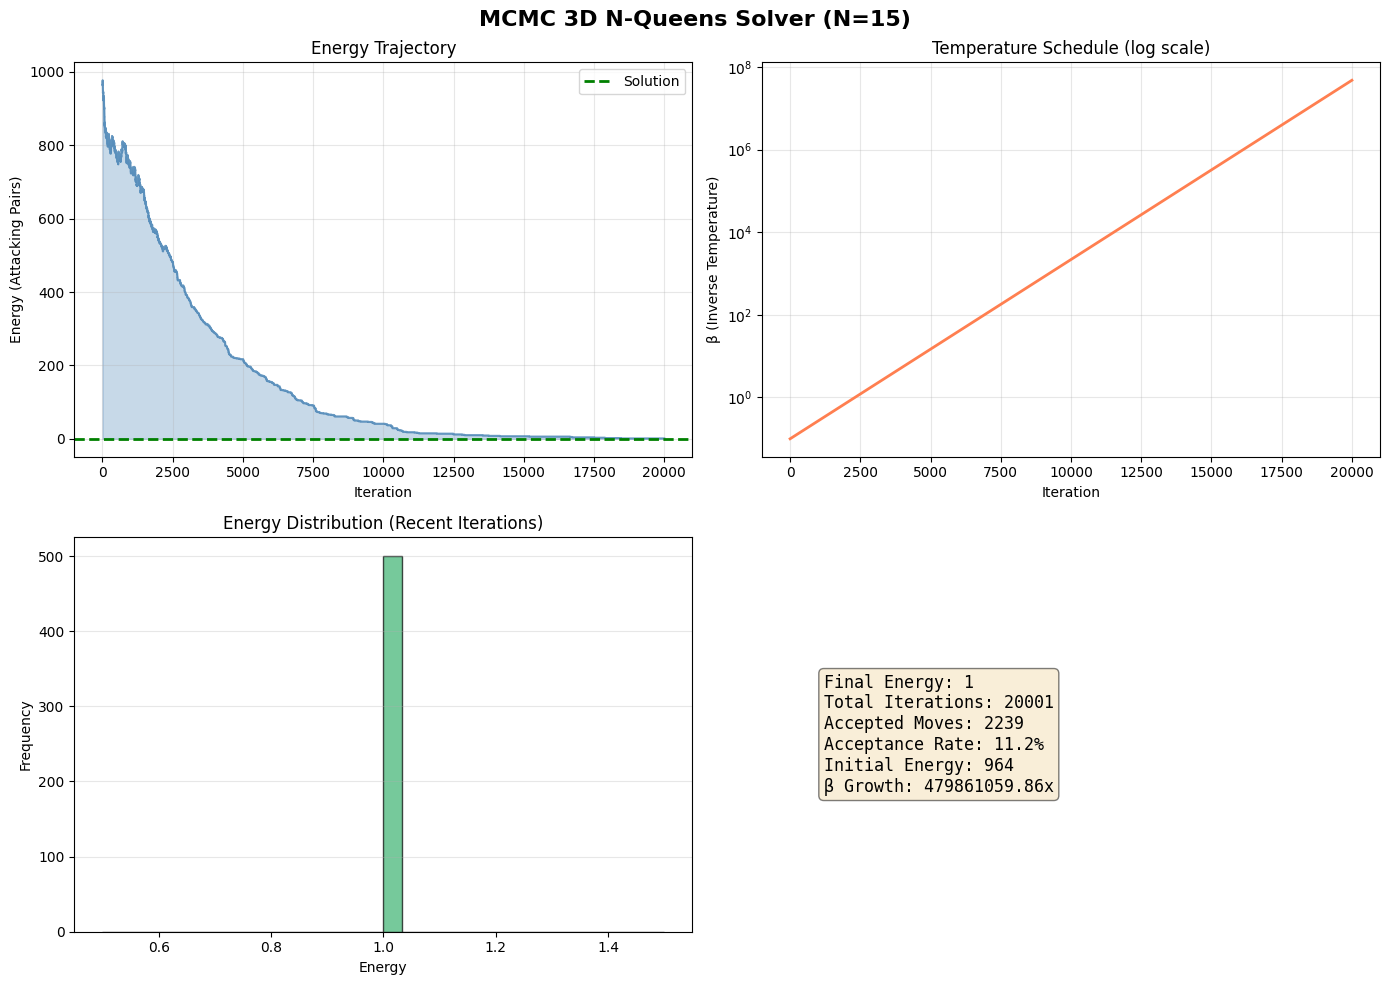


Final solution energy: 1


In [5]:
board_size = 15
num_iterations = 20000

print(f"Running MCMC for {board_size}×{board_size}×{board_size} N-Queens problem...")
result = mcmc_chain(
    board_size=board_size,
    num_iterations=num_iterations,
    beta_func=exponential_beta,
    acceptance_func=metropolis_hastings,
    target_energy=0,
    verbose=False
)

visualize_results(result, board_size)
plt.show()

print(f"\nFinal solution energy: {result.min_energy}")